In [1]:
import pandas as pd 

In [2]:
boston = pd.read_csv('Housing Prices.csv')

In [3]:
boston.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


<Axes: >

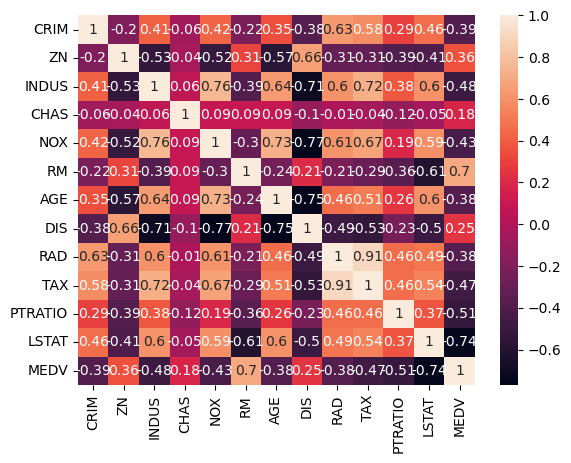

In [4]:
import seaborn as sns 
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [5]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+LSTAT', data=boston, return_type="dataframe")

vif = pd.Series([variance_inflation_factor(X.values, i)for i in range(X.shape[1])],index=X.columns)
vif

Intercept    535.526619
CRIM           1.767486
ZN             2.298459
INDUS          3.987181
CHAS           1.071168
NOX            4.369093
RM             1.912532
AGE            3.088232
DIS            3.954037
RAD            7.445301
TAX            9.002158
PTRATIO        1.797060
LSTAT          2.870777
dtype: float64

In [7]:
boston = boston.drop(['TAX'], axis=1)

In [8]:
y2, X2 = dmatrices('MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+PTRATIO+LSTAT', data=boston, return_type="dataframe")

vif = pd.Series([variance_inflation_factor(X2.values, i)for i in range(X2.shape[1])],index=X2.columns)
vif

Intercept    529.480235
CRIM           1.767349
ZN             2.184172
INDUS          3.217951
CHAS           1.055023
NOX            4.343300
RM             1.902642
AGE            3.085756
DIS            3.952445
RAD            2.772208
PTRATIO        1.787049
LSTAT          2.870408
dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
boston_train, boston_test = train_test_split(boston, test_size=0.2, random_state=42)

In [11]:
import statsmodels.formula.api as smf

hp_model = smf.ols('MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+PTRATIO+LSTAT',data=boston_train).fit()

In [12]:
print(hp_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     98.99
Date:                Sat, 21 Feb 2026   Prob (F-statistic):          7.75e-106
Time:                        20:53:10   Log-Likelihood:                -1206.6
No. Observations:                 404   AIC:                             2437.
Df Residuals:                     392   BIC:                             2485.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.2203      5.555      6.340      0.0

In [13]:
hp_model = smf.ols('MEDV~CRIM+CHAS+NOX+RM+DIS+PTRATIO+LSTAT',data=boston_train).fit()
print(hp_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     154.2
Date:                Sat, 21 Feb 2026   Prob (F-statistic):          6.26e-109
Time:                        20:53:26   Log-Likelihood:                -1209.4
No. Observations:                 404   AIC:                             2435.
Df Residuals:                     396   BIC:                             2467.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.8452      5.073      6.278      0.0

<Axes: xlabel='pred', ylabel='res'>

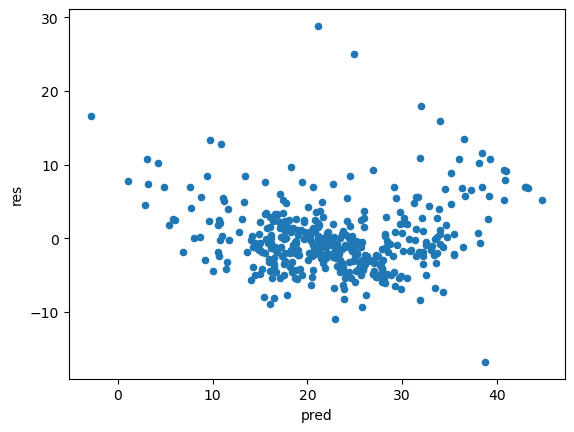

In [14]:
boston_train['pred'] = hp_model.predict(boston_train)
boston_train['res']=hp_model.resid
boston_train.plot.scatter(x='pred', y='res')

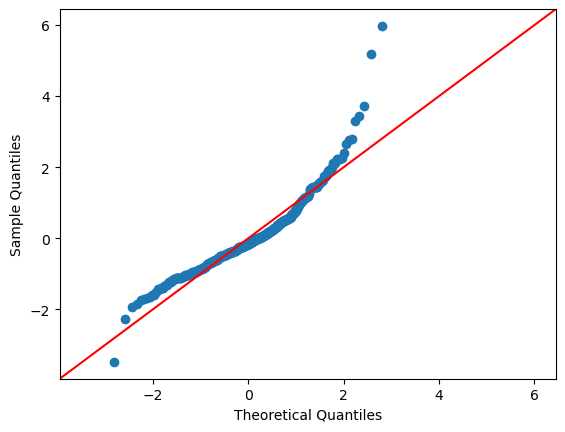

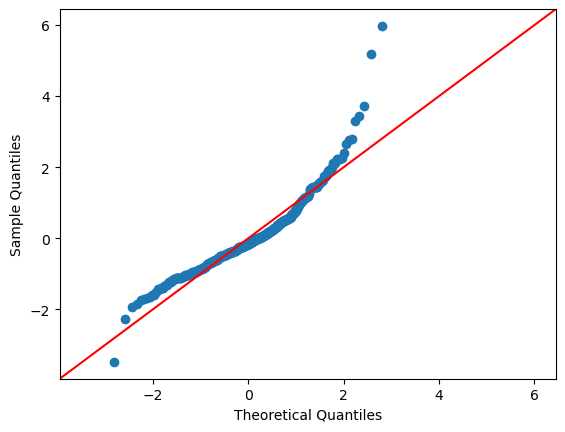

In [15]:
import statsmodels.api as sm
sm.graphics.qqplot(boston_train.res, line='45', fit=True)

In [16]:
import scipy as sp
sp.stats.shapiro(boston_train.res)

ShapiroResult(statistic=0.9116813277256136, pvalue=1.291429085586914e-14)

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

rmse = (np.sqrt(mean_squared_error(boston_train['MEDV'], boston_train['pred'])))
r2 = r2_score(boston_train['MEDV'], boston_train['pred'])

print('RMSE is {}'.format(rmse))

RMSE is 4.828905476132975


In [18]:
print('R2 score is {}'.format(r2))

R2 score is 0.7315826585744917


In [19]:
y_test_predict = hp_model.predict(boston_test)
rmse = (np.sqrt(mean_squared_error(boston_test['MEDV'], y_test_predict)))
r2 = r2_score(boston_test['MEDV'], y_test_predict)

print('RMSE is {}'.format(rmse))

RMSE is 5.10498883392664


In [20]:
print('R2 score is {}'.format(r2))

R2 score is 0.6446261208488169


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression


X = boston.drop(labels=['MEDV','ZN', 'INDUS', 'RAD', 'AGE'], axis=1)
Y = boston['MEDV']
hp_model1 = LinearRegression()


folds = KFold(n_splits = 4, shuffle = True, random_state = 100)
scores = cross_val_score(hp_model1, X, Y, scoring='r2', cv=folds)


print("Mean 4-Fold R Squared: {}".format(np.mean(scores)))

Mean 4-Fold R Squared: 0.7073913275172318


In [22]:
cv_rmse_scores= cross_val_score(hp_model1, X, Y, cv=folds, scoring='neg_mean_squared_error')
np.sqrt(-(np.mean(cv_rmse_scores)))

4.971825927756832